EPITA 2019 MLRF practice_01-03_image-manipulations v2019-04-28_180653 by Joseph CHAZALON

<div style="overflow: auto; padding: 10px; margin: 10px 0px">
<img alt="Creative Commons License" src='img/CC-BY-4.0.png' style='float: left; margin-right: 20px'>
    
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
</div>

# Practice session 1 part 3: Image manipulations

Make sure you read and understand everything, and complete all the required actions.
**Required actions** are preceded by the following sign:
![Back to work!](img/work.png)

Perform a couple checks…

In [2]:
# deactivate buggy jupyter completion
%config Completer.use_jedi = False

Import the modules we already know

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## About OpenCV and scikit-image

[OpenCV](https://opencv.org/) is an open-source library originally developped at Intel. Its documentation is available here: https://docs.opencv.org/. Its current version is 4.1. It is written in C++ and had bindings for Java, Python and Javascript. It contains a huge number of algorithms and techniques for many computer vision problems.

We will use the Python wrapper and a pre-packaged Python package available here: https://pypi.org/project/opencv-python/. If necessary, it can be installed using pip:
```shell
pip install --user opencv-contrib-python-headless
```

OpenCV used to have a pretty readable documentation for the 2.x series, but the latest versions made it harder to develop Python code. However, its processing speed usually is fair and it is a good prototyping tool. Python samples usually a great source of inspiration; they are available under the [sample/python](https://github.com/opencv/opencv/tree/master/samples/python) source tree.


[scikit-image](https://scikit-image.org/) is another open-source library moslty written in Python. It more recent but it gains power and it completes well OpenCV for some problems, even if it often is slower than OpenCV. Its API is also simpler to use in Python and its documentation (available here: http://scikit-image.org/docs/stable/) is very pleasant to read.
If necessary, it can be installed using pip:
```shell
pip install --user scikit-image
```

We will go through the basic image manipulation tasks using both OpenCV and scikit-image.
Later, you may need to use both of them so make sure to have a look at both.
The good thing is that **they both heavily rely on NumPy to represent image data**, so an important part of what follows will actually be NumPy code!

Import **new modules** we will now use.

In [4]:
import cv2
import skimage

If the previous imports failed, you may now install the packages you need.

In [5]:
# TODO do you need to install packages?
print("NO")

NO


### Similarities between OpenCV and scikit-image
1. Raw image data is usable as a NumPy array.
2. They have the same coordinate system: the origin (0, 0) is at top-left corner.
3. The underlying buffer has the same shape: (rows, columns, channels).


### Differences between OpenCV and scikit-image
1. The most important difference is that OpenCV represents the underlying image buffer with channels in the BGR order, whereas scikit-image represents it in the RGB order.
2. OpenCV represents images using a strict set of types (`uint8` or `CV_8U` for most operations) but sometimes accepts `uint16` / `CV_16U` or `float32` / `CV_32F` values. Expect strange error messages from the the wrapper complaining about incompatible types. scikit-image, on the other hand, tends to work better with floats, though it supports other NumPy types well.
3. Many OpenCV functions require a `size` parameter (to resize an image, to create a structuring element, etc.) and this `size` usually is the reversed `shape` of the resulting NumPy object! **Just remember to be extra careful with the `size` parameter of OpenCV functions.**

## Reading and writing images
Let's get started!

### scikit-image version
You can read and write image using the [skimage.io module](http://scikit-image.org/docs/stable/api/skimage.io.html).

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Read the image `"res/practice_01/sample_img.png"` and display its shape and data type.**
</div>

In [6]:
# TODO read image an display its shape and its dtype --- F
im_ski = skimage.io.imread("res/practice_01/sample_img.png")

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Now display the image using matplotlib.**
</div>

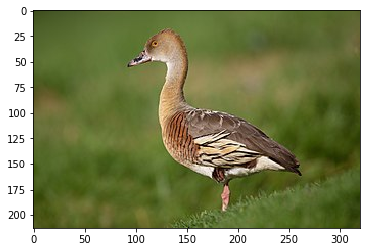

In [7]:
# TODO display image (hint: use matplotlib's imshow function) --- F
plt.figure()
plt.imshow(im_ski)
plt.show()

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Write the image under another name (maybe another format) at any place you like.**

**(Optional) Use a shell escape to check it was created with the appropriate content.**
</div>

In [10]:
# TODO --- F
skimage.io.imsave("canard.jpg", im_ski)

### OpenCV version
OpenCV exposes `imread` and `imsave` directly in the main namespace.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Perform the same operations using OpenCV. What's wrong?**
</div>

In [8]:
# TODO load image --- F
im_ocv = cv2.imread("res/practice_01/sample_img.png")

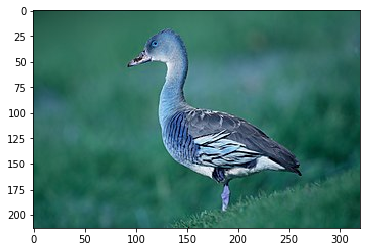

In [11]:
# TODO display --- F
plt.imshow(im_ocv)

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Complete the following explaination.**
</div>

Matplotlib expects images with channels in the ??? order, while OpenCV channels are stored in ... order.

OpenCV makes is easy to convert colors between many formats. The `cv2.cvtColor` function is the one you are looking for. Conversion code start with `cv2.COLOR_*`.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Convert the color of the image passed to the plotting function to correct its appearance.**
</div>

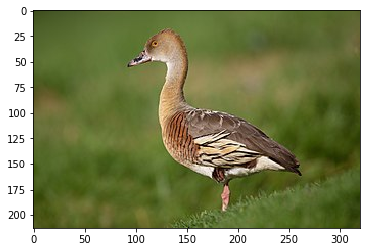

In [20]:
# TODO new plot --- F
im = cv2.cvtColor(im_ocv, cv2.COLOR_BGR2RGB)

plt.imshow(im)

## Selecting image areas
You can select image areas using any NumPy indexing, slicing or masking method you like.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Find the right selection code to erase the duck's head.**
</div>

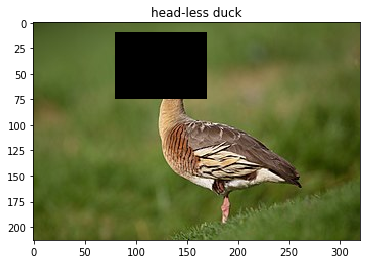

In [28]:
# TODO find the right selection code to erase the duck's head  ---- F
im_test = im_ski.copy()
im_test[10:75,80:170] = 0
plt.figure()
plt.imshow(im_test)
plt.title("head-less duck")
plt.show()

Masking is a very powerful tool, allowing you to threshold images in a single line of code.

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Conversely, display only the head of the duck.**
</div>

This shows you how to select regions of interest (ROIs) easily.

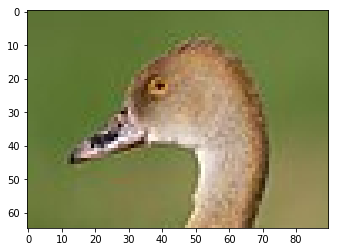

In [41]:
#TODO display duck head --- F
plt.imshow(im_ski[10:75,80:170])

<div style="overflow: auto; border-style: solid; border-color: red; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="stop" src='img/stop.png' style='float: left; margin-right: 20px'>
    
**Now you can realize that the $(x,y)$ notation from cartesian systems is misleading here: $x$ would be the second coordinate and $y$ the first one.**

This is a common source of confusion and we recommend that you use $(row, col)$ notation instead, which better aligns with the row-major buffer storage in NumPy. Another advantage is that the "heigth" and "width" terms which are very commonly used make more sense in this convention.

Another important thing to note is that the `shape` of some image therefore always is `(rows, columns, channels)` (for OpenCV, scikit-image and most of Python image libraries), which is equivalent to `(height, width, channels)`.
Beware: image processing software often communicate the shape of an image in the $(width, height)$ convension (like screen resolutions we are used to), so **be extra careful when reading coordinates and shapes!**
</div>

## Masking

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Improve the code below to remove as much background as possible using a color mask.**
</div>

This will be a very naive segmentation, making good use of the properties of the image!

*Tip 1: You can either choose to keep the foreground, or to remove the background.*

*Tip 2: use `np.logical_and` or `&` to combine boolean masks.*

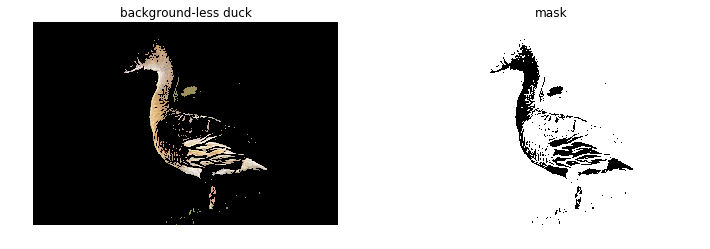

In [55]:
# TODO erase much of the background to segment the duck
from functools import reduce
im_test = im_ski.copy()
plt.figure(figsize=(12,8))
mask = ((im_test[...,0] >= 0) & (im_test[...,0] <= 255)  # FIXME edit those lines
        & (im_test[...,1] >= 0) & (im_test[...,1] <= 14)
        & (im_test[...,2] >= 0) & (im_test[...,2] <= 255))
im_test[mask] = 0  # The mask is True for background pixels here, we erase selected pixels
plt.subplot(1, 2, 1)
plt.imshow(im_test)
plt.axis('off')
plt.title("background-less duck")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("mask")
plt.imshow(mask, cmap='gray')

It is (maybe) your first optimisation problem for image processing!

What you did was trying to find good parameters (thresholds) in the color space:
- low and high R values,
- low and high G values,
- low and high B values.

Could you automate that process? Could you compute the optimal parameters in some way?

<div style="overflow: auto; border-style: dotted; border-width: 1px; padding: 10px; margin: 10px 0px">
<img alt="work" src='img/work.png' style='float: left; margin-right: 20px'>

**Write down some ideas about how to automate the process of finding the appropriate thresholds.**
</div>

TODO throw some quick ideas here.

# Job done!
We will learn new image processing functions on the go in the next stage: [*Twin it!* part 1](practice_01-04_twinit-part1.ipynb).